## Importações

In [ ]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings("ignore")

##  Variáveis fuzzy 

In [ ]:

comida = ctrl.Antecedent(np.arange(0, 10.1, 0.1), 'comida')
servico = ctrl.Antecedent(np.arange(0, 10.1, 0.1), 'servico')
gorjeta = ctrl.Consequent(np.arange(0, 20.1, 0.1), 'gorjeta')

## Funções de pertinência

In [ ]:
comida['pessima']   = fuzz.trapmf(comida.universe, [0, 0, 3, 5])
comida['comivel']   = fuzz.trimf(comida.universe, [3, 5, 7])
comida['deliciosa'] = fuzz.trapmf(comida.universe, [5, 7, 10, 10])

servico['ruim']      = fuzz.trapmf(servico.universe, [0, 0, 3, 5])
servico['aceitavel'] = fuzz.trimf(servico.universe, [3, 5, 7])
servico['excelente'] = fuzz.trapmf(servico.universe, [5, 7, 10, 10])

gorjeta['baixa'] = fuzz.trapmf(gorjeta.universe, [0, 0, 5, 12])
gorjeta['media'] = fuzz.trimf(gorjeta.universe, [8, 12.5, 17])
gorjeta['alta']  = fuzz.trapmf(gorjeta.universe, [12, 17, 20, 20])

## Regras

In [ ]:
rule1 = ctrl.Rule(comida['pessima']   & servico['ruim'],      gorjeta['baixa'])
rule2 = ctrl.Rule(comida['comivel']   & servico['ruim'],      gorjeta['baixa'])
rule3 = ctrl.Rule(comida['deliciosa'] & servico['ruim'],      gorjeta['media'])
rule4 = ctrl.Rule(comida['pessima']   & servico['aceitavel'], gorjeta['baixa'])
rule5 = ctrl.Rule(comida['comivel']   & servico['aceitavel'], gorjeta['media'])
rule6 = ctrl.Rule(comida['deliciosa'] & servico['aceitavel'], gorjeta['media'])
rule7 = ctrl.Rule(comida['pessima']   & servico['excelente'], gorjeta['media'])
rule8 = ctrl.Rule(comida['comivel']   & servico['excelente'], gorjeta['alta'])
rule9 = ctrl.Rule(comida['deliciosa'] & servico['excelente'], gorjeta['alta'])

gorjeta_ctrl = ctrl.ControlSystem([rule1,rule2,rule3,rule4,rule5,rule6,rule7,rule8,rule9])
avaliacao = ctrl.ControlSystemSimulation(gorjeta_ctrl)

In [28]:
avaliacao.input['comida'] = 8.5
avaliacao.input['servico'] = 9.0
avaliacao.compute()

print("Gorjeta recomendada: %.2f %%" % avaliacao.output['gorjeta'])

Gorjeta recomendada: 17.06 %


## Gráficos

In [ ]:
# --------- Gráfico comida ---------
fig = comida.view()
plt.savefig("comida.png", dpi=300, bbox_inches='tight')
plt.show()

In [ ]:
# --------- Gráfico serviço ---------
fig = servico.view()
plt.savefig("servico.png", dpi=300, bbox_inches='tight')
plt.show()

In [ ]:
# --------- Gráfico gorjeta ---------
fig = gorjeta.view()
plt.savefig("gorjeta.png", dpi=300, bbox_inches='tight')
plt.show()

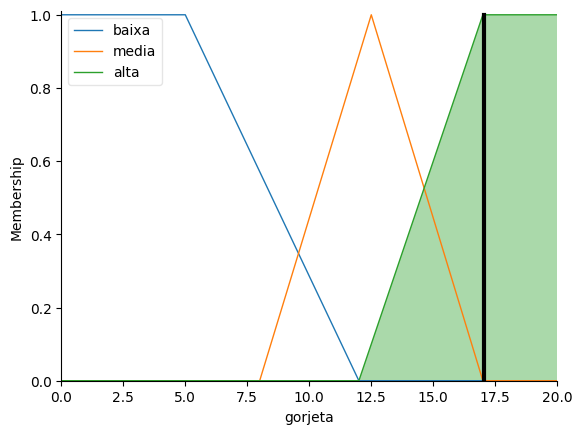

In [29]:
# --------- Gráfico defuzzificação ---------
fig = gorjeta.view(sim=avaliacao)
plt.savefig("defuzzificacao.png", dpi=300, bbox_inches='tight')
plt.show()

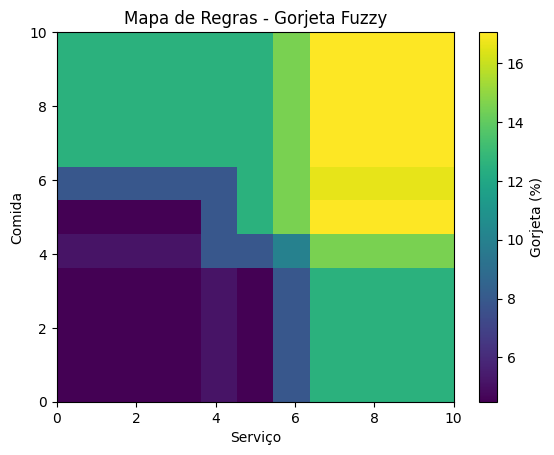

In [30]:
import numpy as np
import matplotlib.pyplot as plt

comida_range = np.arange(0, 11)
servico_range = np.arange(0, 11)
heatmap = np.zeros((len(comida_range), len(servico_range)))

for i,c in enumerate(comida_range):
    for j,s in enumerate(servico_range):
        avaliacao.input['comida'] = c
        avaliacao.input['servico'] = s
        avaliacao.compute()
        heatmap[i,j] = avaliacao.output['gorjeta']

plt.imshow(heatmap, origin='lower', extent=[0,10,0,10], aspect='auto')
plt.colorbar(label="Gorjeta (%)")
plt.xlabel("Serviço")
plt.ylabel("Comida")
plt.title("Mapa de Regras - Gorjeta Fuzzy")

plt.savefig("mapa_regras.png", dpi=300, bbox_inches='tight')
plt.show()